# Abalone Dataset - (Imbalanced: 18 vs 9)

### Download : https://sci2s.ugr.es/keel/dataset.php?cod=116

# Description :

- This section describes main characteristics of the abalone9-18 data set and its attributes.


- **General information :**

    - Type : Imbalanced
    - Origin : Real world
    - Features : 8
    - (Real / Integer / Nominal) : (7 / 0 / 1)
    - Instances : 731
    - IR : 16.4
    - %Positive instances : 5.75
    - %Negative instances : 94.25
    - Missing values : No
    


- **Attribute description :**

    - Sex : {M, F, I} - (Male/Female/Infant)
    - Length : [0.075, 0.815]
    - Diameter : [0.055, 0.65]
    - Height : [0.0, 1.13]
    - Whole_weight : [0.0020, 2.8255]
    - Shucked_weight : [0.0010, 1.488]
    - Viscera_weight : [5.0E-4, 0.76]
    - Shell_weight : [0.0015, 1.005]
    - Class : {positive, negative}
    


- **Additional information :**

    - A imbalanced version of the Abalone data set, where the possitive examples belong to class 18 and the negative examples belong to class 9.
    
***Objective :**<b>

- To make detailed case study on Imbalanced dataset.

- To Explore data, build a statistical model on Abalone9/18 before and after we apply Resampling techniques. And then compare results.

  ***By Gaurav Padawe - 06th April, 2019***

### Importing Required Packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('abalone9-18.dat', header=0)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class
0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,negative
1,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,negative
2,M,0.450,0.320,0.100,0.3810,0.1705,0.0750,0.115,negative
3,F,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.200,negative
4,M,0.665,0.525,0.165,1.3380,0.5515,0.3575,0.350,positive


In [3]:
#shape of data

df.shape

(731, 9)

- We've 731 examples and 9 features.

### EDA

Text(0.5, 1.0, 'Gender Count')

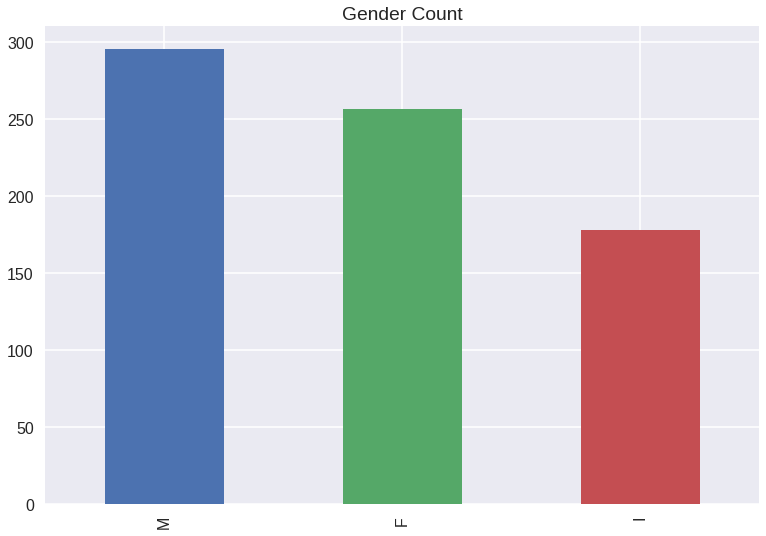

In [4]:
#gender frequency

sns.set_context('poster')
df['Sex'].value_counts().plot(kind='bar')
plt.title('Gender Count')

- We can observe that Sex is either Male ("M"), Female ("F") or Infant ("I"), this is not suitable for regression algorithms, so we create a binary/boolean feature for each of the 3 options in later part of Code.

Text(0.85, 42, 'Count : 42')

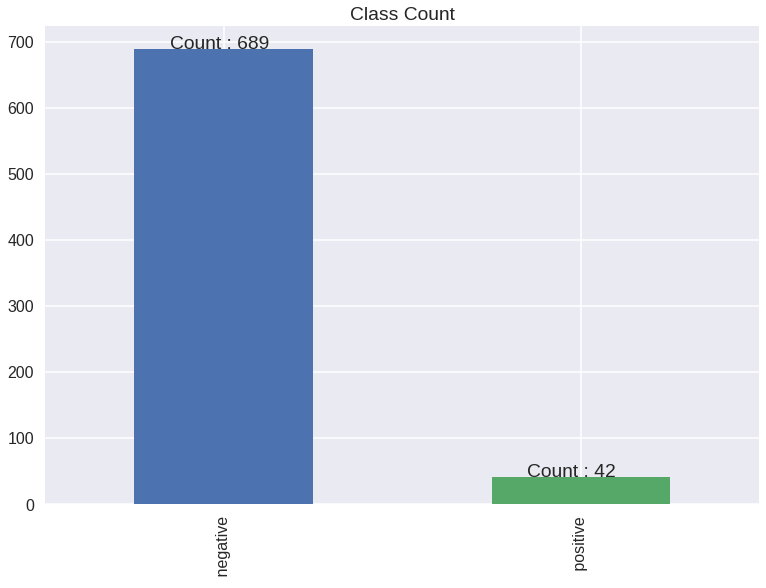

In [5]:
#Target class count

df[df.columns[-1]].value_counts().plot(kind='bar')
plt.title('Class Count')
plt.annotate('Count : 689', (-0.15,689))
plt.annotate('Count : 42', (0.85, 42))

- We've 2 Classes - Negative and Positive. Given that Negative Class being the Dominant one, making this Dataset fairly Imbalanced.


- We'll further see step-by-step how we can handle Imbalanced Datasets.

In [6]:
#Identify null values

df.isnull().any()

Sex                False
 Length            False
 Diameter          False
 Height            False
 Whole_weight      False
 Shucked_weight    False
 Viscera_weight    False
 Shell_weight      False
Class              False
dtype: bool

- No Null / NaN values found in our dataset.

In [7]:
#dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
Sex                731 non-null object
 Length            731 non-null float64
 Diameter          731 non-null float64
 Height            731 non-null float64
 Whole_weight      731 non-null float64
 Shucked_weight    731 non-null float64
 Viscera_weight    731 non-null float64
 Shell_weight      731 non-null float64
Class              731 non-null object
dtypes: float64(7), object(2)
memory usage: 51.5+ KB


- **info( )** gives us a fair idea on various Datatypes across features but we can also use **info( )** to figure out Null / NaN values. 

Text(0.5, 1.0, 'Basic Statistics (Transposed)')

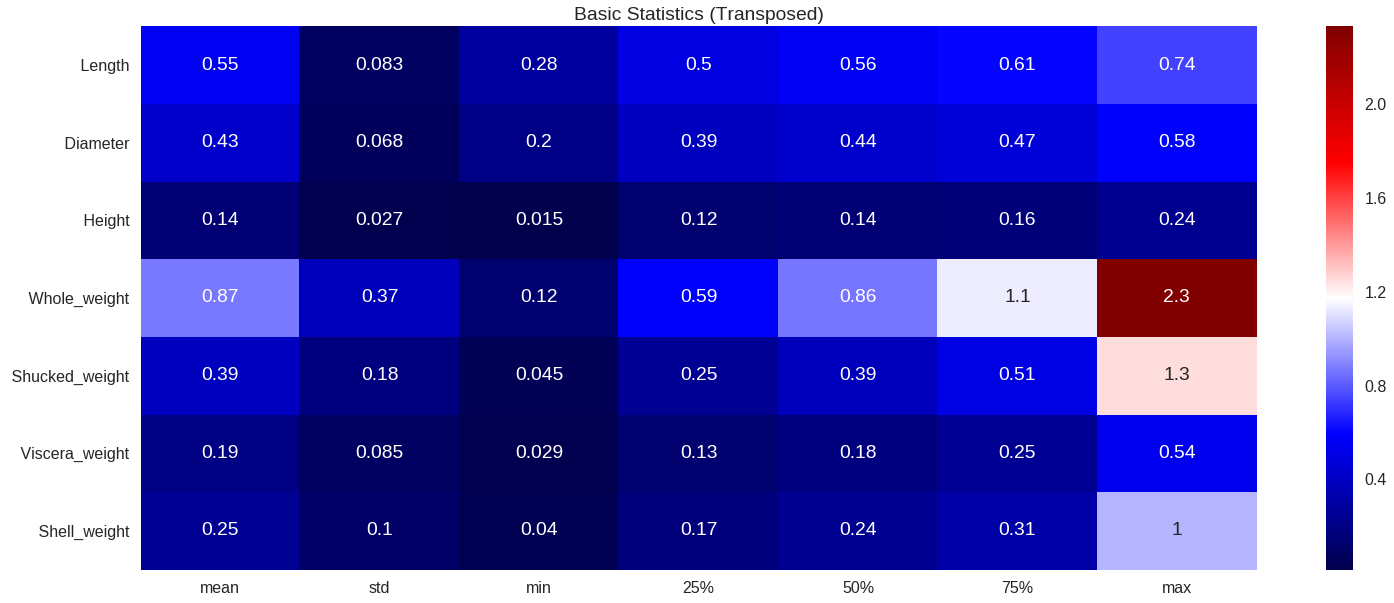

In [8]:
#Descriptive statistics

plt.figure(figsize=(25,10))
sns.heatmap(df.describe().T.drop('count', axis=1), annot=True, cmap='seismic')
plt.title('Basic Statistics (Transposed)')

- Above Plot / heatmap gives us basic statistical Information. Although I had embedded **describe( )** in heatmap so we could make it more appealing.


- Generates descriptive statistics that summarize the central tendency, Inter-Quartile Range / Standard Deviation, dispersion and shape of a dataset’s distribution, excluding NaN values.

Text(0.5, 1.0, 'Corelation Plot')

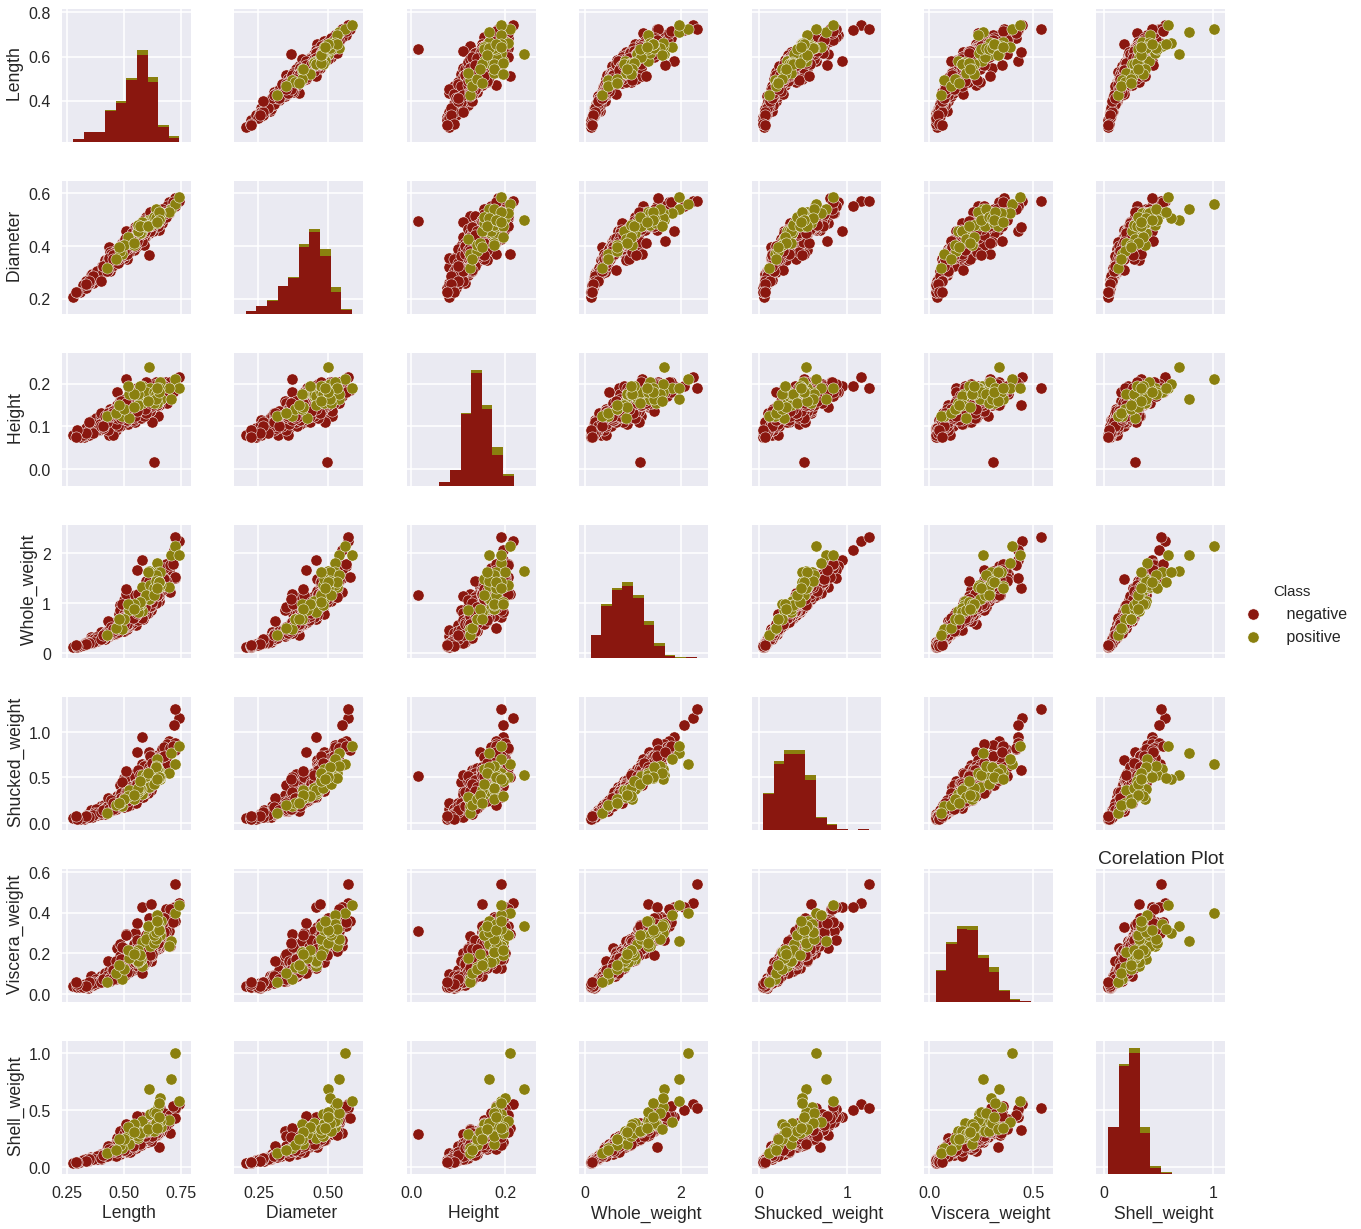

In [9]:
#Correlation

sns.pairplot(df, hue='Class', palette=sns.hls_palette(7, l=.3, s=.8))

**Correlation plot Observation :**

- Above Plot provides us with pairwise relationships in a dataset.


- It's important to note that we've less amount of features so it's quite easy to determine relationship in the Figure but if we'll have more features then pairplot can become more complex and it will be extremely difficult to make any observations out of it.


- We've one more way to figure out correlation, Let's see how can we do it , Let us first Label Encode "Sex" and "Class"

In [0]:
#Label encode discrete values

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

df['Sex'] = enc.fit_transform(df['Sex'])
df['Class'] = enc.fit_transform(df['Class'])

In [11]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class
0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
1,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,0
2,2,0.450,0.320,0.100,0.3810,0.1705,0.0750,0.115,0
3,0,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.200,0
4,2,0.665,0.525,0.165,1.3380,0.5515,0.3575,0.350,1


Text(0.5, 1.0, 'Correlation Plot')

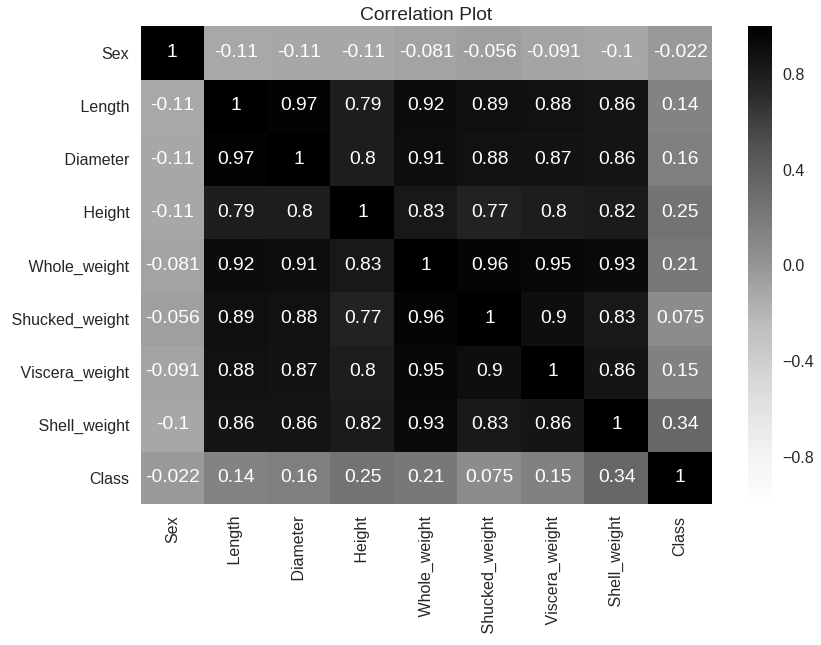

In [12]:
#Pearson Correlation 

sns.heatmap(df.corr(), annot=True, cmap='Greys')
plt.title('Correlation Plot')

- Again, we've embedded Corr( ) in heatmap to make it more appealing.


- Above observation provides us numerical information on how closely related a specific feature is to every other feature.


- The relationship between two variables is generally considered strong when their r value is larger than 0.7. The correlation r measures the strength of the linear relationship between two quantitative variables. Pearson r is always a number between -1 and 1.

### Model Implementation

- We'll use Logistic Regression as our Estimator for this Case Study.


- Accuracy score, Training score, Testing  score, Cross Validation score are all implemented below as they help us identify the model Over / Under Fitting phenomena. 

In [0]:
#train test split

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x = df.drop(['Class'], axis=1)
y = df['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=50)

In [14]:
#Building a statistical model as is

est = LogisticRegression(solver='lbfgs')
est.fit(xtrain, ytrain)

print (' Accuracy Score : ' ,accuracy_score(ytest, est.predict(xtest))*100, '\n',
       'Validation Score : ', est.score(xtest, ytest)*100, '\n',
       'Cross Validation Score : ', cross_val_score(est, xtrain, ytrain, cv=5).mean()*100,'\n',
       'Classification Report : ', '\n', classification_report(ytest, est.predict(xtest)))

 Accuracy Score :  95.91836734693877 
 Validation Score :  95.91836734693877 
 Cross Validation Score :  93.66195107574417 
 Classification Report :  
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       140
           1       1.00      0.14      0.25         7

   micro avg       0.96      0.96      0.96       147
   macro avg       0.98      0.57      0.61       147
weighted avg       0.96      0.96      0.94       147



- Great ! Looks like we had done great Job isn't it ?


- Our Accuracy score & Cross Validation Score are Bang on. They are approximately close which means no Over / Under Fitting.


- That's it we're too good to go.

### Hang on.... We're missing something important.

- We can observe that Recall Score of our model, the Positive class (1) has got 0.14 stating that it has almost no weight. Our model can only correctly classify Negative Class (0) as it has got Majority of Weight and it's dominating the Minority Class. Accuracy Score of 95% is just an Illusion. We can also further check the Confusion Matrix to get better idea of how much our model is correct in identifying the Classes.


- Why Oh !! Why ? It's bacause we're dealing with Imbalnced Dataset or simply put it like this - One Class is Dominating Other Class.


- Let's review it Ahead by Confusion Matrix.

Text(0.5, 1.0, 'Confusion Matrix - Diagonal Values are correct Identification')

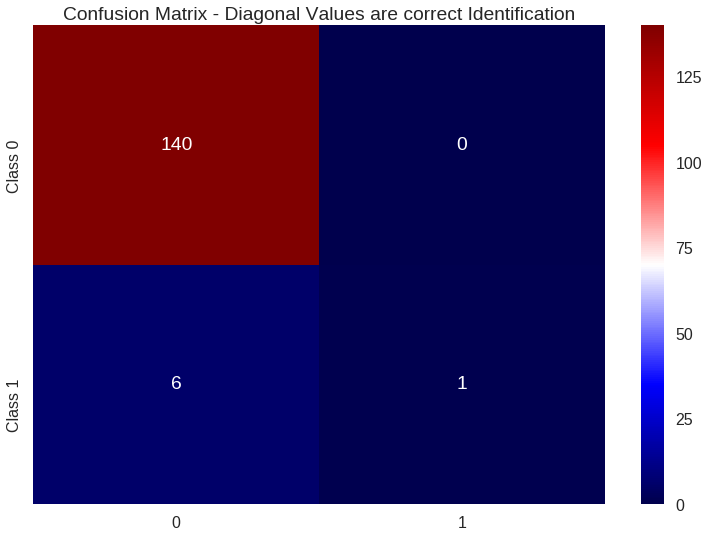

In [15]:
sns.heatmap(confusion_matrix(ytest, est.predict(xtest)), annot=True, fmt='d', cmap='seismic')
plt.yticks(ticks=(0.5,1.5),labels=('Class 1','Class 0'))
plt.title('Confusion Matrix - Diagonal Values are correct Identification')

- Above Confusion Matrix Plot tells us that our model successfully yet correctly Identified Negative Class (0). But Failed to correctly identify Positive Class (1). It Identified 6 Positive classes as Negative Class and identified only 1 Positive Class correctly. Higher the Diagonal values , more correct the identification of Classes is. 

### Class Prediction by reducing features 

- We can also experiment the class identification by reducing features/predictors. Below, we will take only 'Diameter' and ''Length' into account and predict our class to see how it goes.

In [0]:
x = df[[' Diameter', ' Length']]
y = df['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=50)

In [17]:
est = LogisticRegression(solver='lbfgs')
est.fit(xtrain, ytrain)

print (' Accuracy Score : ' ,accuracy_score(ytest, est.predict(xtest))*100, '\n',
       'Validation Score : ', est.score(xtest, ytest)*100, '\n',
       'Cross Validation Score : ', cross_val_score(est, xtrain, ytrain, cv=5).mean()*100,'\n',
       'Classification Report : ', '\n', classification_report(ytest, est.predict(xtest)))

 Accuracy Score :  95.23809523809523 
 Validation Score :  95.23809523809523 
 Cross Validation Score :  94.00677866195106 
 Classification Report :  
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       140
           1       0.00      0.00      0.00         7

   micro avg       0.95      0.95      0.95       147
   macro avg       0.48      0.50      0.49       147
weighted avg       0.91      0.95      0.93       147



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- As I mentioned above that Accuracy score is just a trap, we are getting fooled by Accuracy Score. This time we can observe that the model is biased and is only correctly identifying Negative Class (0) while giving no Importance to Positive class (1) - Refer to Recall Score of (1) , we cannot deploy such model into Production environment as it will always be biased (in our case study) focusing mainly on just Negative Class (0), in such way the problem statement given to us will never be fulfilled.



- Let's also check Confusion Matrix since we're here.

Text(0.5, 1.0, 'Confusion Matrix - Diagonal Values are correct Identification')

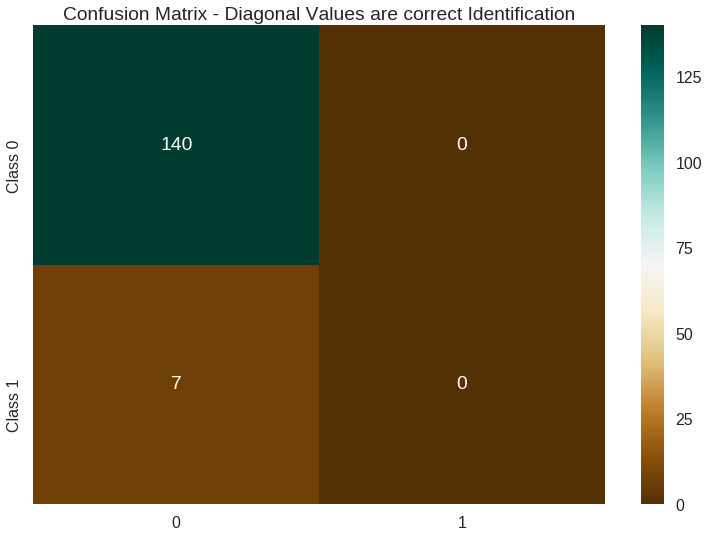

In [18]:
sns.heatmap(confusion_matrix(ytest, est.predict(xtest)), annot=True, fmt='d', cmap='BrBG')
plt.yticks(ticks=(0.5,1.5),labels=('Class 1','Class 0'))
plt.title('Confusion Matrix - Diagonal Values are correct Identification')

- This time our Positive Class (1) wasn't even identified correctly once. This is Terrible. Now Question is how to sove this critical Issue ? What can we do ? What approach we need to take ?

### Resampling

- Resampling Dataset is one of the most popular technique used to Adjust the Classes but as we all know everything has its Merits and Demerits.


- Resampling Technique includes 2 types :

    - **Under-Sampling**
    - **Over-Sampling**


- Further we'll see it in more detail

![alt text](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

In [19]:
#Examining target class count

class_count = df['Class'].value_counts()
class_count

0    689
1     42
Name: Class, dtype: int64

- Creating 2 seperate Datasets , one consisting Positive Examples (1) and other one with Negative Examples (0).

In [0]:
#Slicing the classes

df_class_neg = df[df['Class'] == 0]
df_class_pos = df[df['Class'] == 1]

- In this case study we'll look at some commonly adopted Resampling Methods


- **Under-Sampling :**
    - Random Under-Sampling
    - Tomek Link (T-Link)


- **Over-Sampling :**
    - Random Over-Sampling
    - SMOTE (Synthetic Minority Over-Sampling Technique)


- We'll first look at Random Resampling Techniques mentioned above and Later step into Fairly advanced Techniques.

### Random Under-sampling

- In Random Under-Sampling technique we remove random examples from Majority / Dominating Class (in our case Negative Class - 0). 


- In our Case Study we'll choose 42 Random Samples from Negative Class which will Balance our Classes in Dataset. (As shown In Figure below)

![alt text](https://cdn-images-1.medium.com/max/800/1*YH_vPYQEDIW0JoUYMeLz_A.png)

Text(0.5, 1.0, 'Under-Sampled Negative Examples')

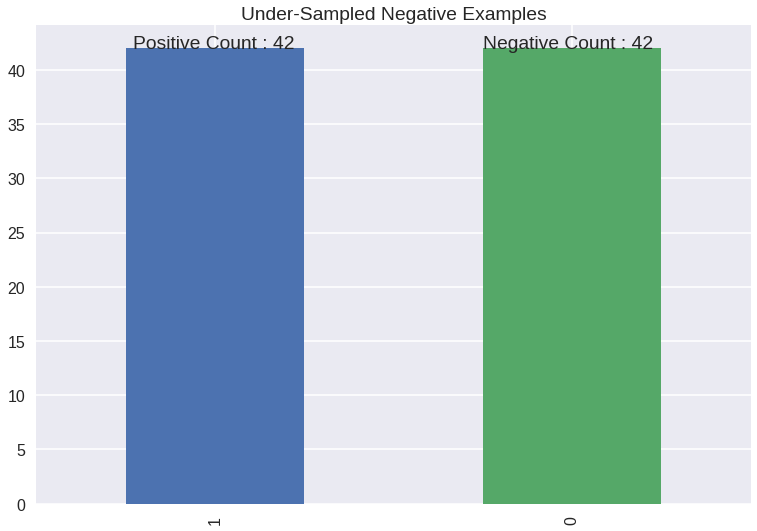

In [21]:
#under sampling plot

df_class_neg_usamp = df_class_neg.sample(class_count[1])
under_sampled_df = pd.concat([df_class_neg_usamp, df_class_pos], axis=0)
under_sampled_df['Class'].value_counts().plot(kind='bar')
plt.annotate('Negative Count : 42', (0.75, 42))
plt.annotate('Positive Count : 42', (-0.23, 42))
plt.title('Under-Sampled Negative Examples')

### Demerits of Random Under-Sampling

- As we learnt above that there are Merits and Demerits of Everything, In Under-sampling we eliminate random examples which may lead loss of Major Information.


- We might lose lot of Important Information from Under-sampling as we're balancing out the classes equally. 

### Random Over-sampling

- In Random Over-Sampling technique we duplicate random examples from Minority Class (in our case Positive Class - 1).


- In our Case Study we'll duplicate Random Samples from Positive Class which will Balance our Classes in Dataset. (As shown In Figure below)

![alt text](https://cdn-images-1.medium.com/max/800/1*aKJJOozIlVVH1gT-4rYy4w.png)

Text(0.5, 1.0, 'Over-Sampled Positive Examples')

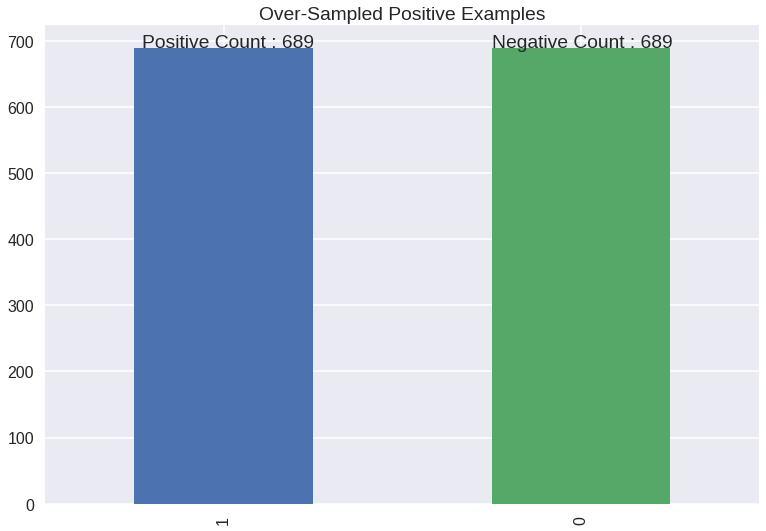

In [22]:
#over sampling plot

df_class_pos_osamp = df_class_pos.sample(class_count[0], replace=True)
over_sampled_df = pd.concat([df_class_pos_osamp, df_class_neg], axis=0)
over_sampled_df['Class'].value_counts().plot(kind='bar')
plt.annotate('Negative Count : 689', (0.75, 690))
plt.annotate('Positive Count : 689', (-0.23, 690))
plt.title('Over-Sampled Positive Examples')

### Demerits of Random Over-Sampling

- In Over-sampling we duplicate random examples which may lead our model to Overfit, which is a huge failure in itself as it will fail to predict future observations (in our case - Misclassification will take place).

### What's next ?

- We can use a python package called **"imblearn"** which is specifically dedicateed to work with Imbalanced Data.


- It consists of adavanced techniques for Resampling.


- We'll go through following Resampling techniques mentioned below :

    - Tomek Link : For Under / Down Sampling.
    - SMOTE (Synthetic Minority Over-Sampling Technique) : As name states , it's for Over / Up Sampling.
    

- Let's implement it.

### Splitting the Dataset further for Resampling

- We have to further split data to train resampling methods on it and test it on our original Data. 


- If we will directly Resample the original Data we will leak the information from our Validation set into Training Set. Which will again give us the High accuracy illusion.


- **Note : We do not have to Under-Sample our Dataset as it's not going to Balance our Dataset but we will do it just for our Learning purpose.**

In [23]:
x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2, random_state=50)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((467, 2), (117, 2), (467,), (117,))

### Under-Sampling using Tomek Links

- Tomek Links pairs closely intact data points of opposite classes and Eliminates the Data points from Majority Class which got paired with the Opposite class.


- Elimination of closely intact data points from Majority Class increases the gap between the 2 classes which further eases the Classification Process.


- Below Figure best explains the Tomek Link Technique.

![alt text](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/tomek.png?v=2)

In [24]:
#implementing tomek links

from imblearn.under_sampling import TomekLinks

tl = TomekLinks(random_state=50, ratio='majority')
x_tl_res, y_tl_res = tl.fit_sample(x_train, y_train)

print (y_train.value_counts(), '\n')
np.bincount(y_tl_res)

0    438
1     29
Name: Class, dtype: int64 



array([433,  29])

In [25]:
#applying logistic regression

est = LogisticRegression(solver='lbfgs')
est.fit(x_tl_res, y_tl_res)

pred =  est.predict(x_test)
print ('Prediction : ', pred, '\n')

print ('Validation Score : ', est.score(x_test, y_test)*100)
print ('Accuracy Score : ', accuracy_score(y_test, pred)*100)
print ('Cross Validation Score : ', cross_val_score(est, x_tl_res, y_tl_res, cv=5).mean()*100)
print ('Classification Report : ', '\n \n', classification_report(y_test, pred))

Prediction :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0] 

Validation Score :  94.87179487179486
Accuracy Score :  94.87179487179486
Cross Validation Score :  93.72578333307645
Classification Report :  
 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       111
           1       0.00      0.00      0.00         6

   micro avg       0.95      0.95      0.95       117
   macro avg       0.47      0.50      0.49       117
weighted avg       0.90      0.95      0.92       117



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 1.0, 'Confusion Matrix - Diagonal Values are correct Identification')

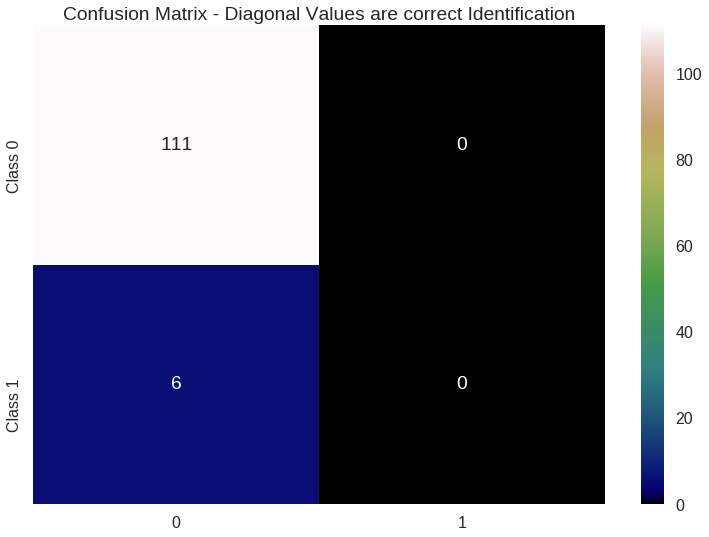

In [26]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='gist_earth')
plt.yticks(ticks=(0.5,1.5),labels=('Class 1','Class 0'))
plt.title('Confusion Matrix - Diagonal Values are correct Identification')

- Under-Sampling isn't gonna work for us (As mentioned above). Our Dataset is still Imbalanced knowing the Fact that Tomek Link eliminates just closely intact instances from Majority class (while preserving the Minority Class data points) but in our case our Majority class is still a dominating one.


- And the results are above, Recall score for Positive class (1) is negligible, as no weightage is given to it by our model.

### Over-Sampling using SMOTE (Synthetic Minority Over-Sampling Technique)

- SMOTE works by creating synthetic observations based upon the existing minority observations (Chawla et al., 2002).


-  For each minority class observation, SMOTE calculates the k nearest neighbors. Depending upon the amount of oversampling needed, one or more of the k-nearest neighbors are selected to create the synthetic examples.

![alt text](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)

In [27]:
#implementing SMOTE

from imblearn.over_sampling import SMOTE, ADASYN

smote = SMOTE(random_state=50, ratio='minority')
x_s_res, y_s_res = smote.fit_sample(x_train, y_train)

print (y_train.value_counts(), '\n')
np.bincount(y_s_res)

0    438
1     29
Name: Class, dtype: int64 



array([438, 438])

In [28]:
est = LogisticRegression(solver='lbfgs')
est.fit(x_s_res, y_s_res)

pred =  est.predict(x_test)
print ('Prediction : ', pred, '\n')

print ('Validation Score : ', est.score(x_test, y_test)*100)
print ('Accuracy Score : ', accuracy_score(y_test, pred)*100)
print ('Cross Validation Score : ', cross_val_score(est, x_s_res, y_s_res, cv=5).mean()*100)
print ('Classification Report : ', '\n \n', classification_report(y_test, pred))

Prediction :  [1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1
 1 0 1 0 0 1] 

Validation Score :  70.94017094017094
Accuracy Score :  70.94017094017094
Cross Validation Score :  64.39132706374086
Classification Report :  
 
               precision    recall  f1-score   support

           0       0.96      0.72      0.82       111
           1       0.09      0.50      0.15         6

   micro avg       0.71      0.71      0.71       117
   macro avg       0.53      0.61      0.49       117
weighted avg       0.92      0.71      0.79       117



Text(0.5, 1.0, 'Confusion Matrix - Diagonal Values are correct Identification')

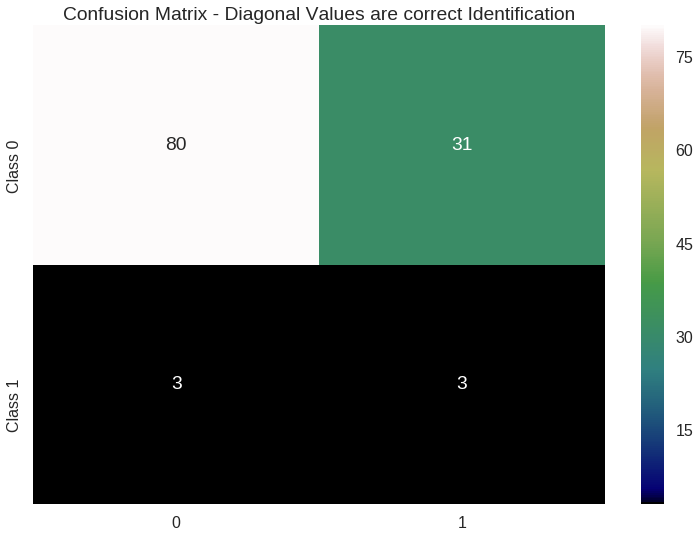

In [29]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='gist_earth')
plt.yticks(ticks=(0.5,1.5),labels=('Class 1','Class 0'))
plt.title('Confusion Matrix - Diagonal Values are correct Identification')

- We can observe that Over-Sampling worked for us. SMOTE gave us some acceptable unbiased outcome . 50% Recall score for our Minority Class.


- Confusion Matrix shows us that our model was able to Classify Positive and Negative Class somewhat well. 


- Although Our model is not a good for production environment, it's not Trained well and cannot generalize new data. (Refer to Cross Validation Score and Accuracy Score)

### Random Forest as our Estimator

In [34]:
#implementing Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_est = RandomForestClassifier(n_estimators=12, criterion='gini', max_depth=7)
rf_est.fit(x_s_res, y_s_res)

pred =  rf_est.predict(x_test)
print ('Prediction : ', pred, '\n')

print ('Validation Score : ', rf_est.score(x_test, y_test)*100)
print ('Accuracy Score : ', accuracy_score(y_test, pred)*100)
print ('Cross Validation Score : ', cross_val_score(rf_est, x_s_res, y_s_res, cv=5).mean()*100)
print ('Classification Report : ', '\n \n', classification_report(y_test, pred))

Prediction :  [0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0] 

Validation Score :  84.61538461538461
Accuracy Score :  84.61538461538461
Cross Validation Score :  86.51776384535005
Classification Report :  
 
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       111
           1       0.17      0.50      0.25         6

   micro avg       0.85      0.85      0.85       117
   macro avg       0.57      0.68      0.58       117
weighted avg       0.93      0.85      0.88       117



Text(0.5, 1.0, 'Confusion Matrix - Diagonal Values are correct Identification')

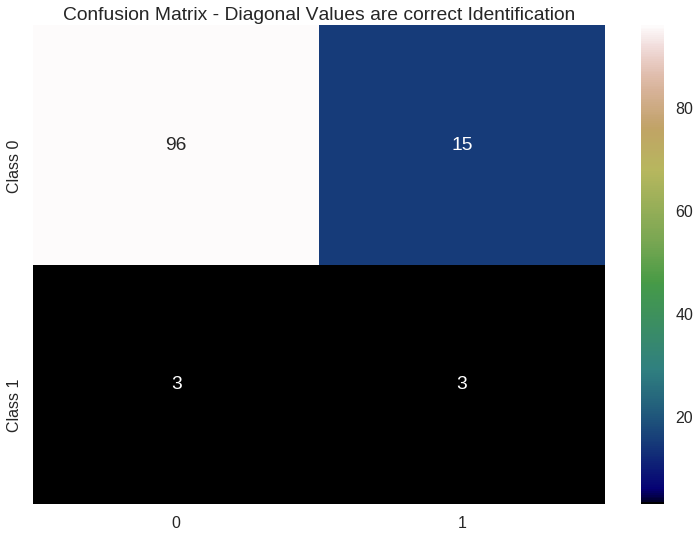

In [35]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='gist_earth')
plt.yticks(ticks=(0.5,1.5),labels=('Class 1','Class 0'))
plt.title('Confusion Matrix - Diagonal Values are correct Identification')

- Great ! We are able to achieve some good results using Random Forest.


- Our Cross Validation Score and Accuracy Score is close to each other , i.e, 86.51% and 84.61%, A slight underfitting but that's acceptable, +/- 2% variation is acceptable.


- Our Recall Score is also not Biased towards Majority Class which is a great achievement for us. 


- Our Confusion Matrix states us that out of 6 Positive examples our Random Forest model classified 3 correctly and also improved a bit over classification of Negative Class.

### How can we Improve ?

- We can improve the classification by Hyper Parameter Tuning using SciKit's **GridSearch CV.**


- We can also try other Estimators like Decision Tree, XGBoost or Deep Learning Implementation.

### References

- **Python Imblearn** : https://imbalanced-learn.readthedocs.io/en/stable/install.html


- **Tomek Link (T-Link) Paper** : https://pdfs.semanticscholar.org/6ec4/18f9071f3a96d5548e87e34be3665703119e.pdf


- **SMOTE Paper** : https://arxiv.org/pdf/1106.1813.pdf